# Training Set vs. Test Set

In [38]:
# import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")
streeteasy.head(2)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan


In [4]:
df = pd.DataFrame(streeteasy)

#### Dependent and Independent data

In [22]:
# These are the columns we want to use for our regression model.
# double bracket for more than one column 

# Independent data
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'building_age_yrs', 'no_fee', 'has_roofdeck', 
       'has_washer_dryer', 'has_doorman', 'has_elevator', 
       'has_dishwasher', 'has_patio', 'has_gym'
      ]]

# Dependent data
y = df['rent']

#### Train Data

- 80% Train data
- 20% Test Data

In [23]:
# train split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 6)

In [24]:
print(x_train.shape)
print(x_test.shape)
 
print(y_train.shape)
print(y_test.shape)

(2831, 12)
(708, 12)
(2831,)
(708,)


In [25]:
df.shape

(3539, 18)

#### Multiple LinearRegression
fittinng our train data

`.fit` will return: 
- slope (.coef_)
- y intercept (.intercept_)

In [26]:
# Fit and train the data
mlr = LinearRegression()
model = mlr.fit(x_train,y_train)
model.coef_

array([-338.99541973, 1194.13930897,    4.92152514,   -9.64436912,
       -127.26375783,   55.34127159,  212.22948712,  -92.47562234,
         82.06221797,  -95.74454285,   21.87832205,  -45.32874552])

In [27]:
# prediction
y_predict = mlr.predict(x_test)
# Now we have:
# x_test,  x_train,  y_test,  y_train  and y_predict!

#### To see this model in action, let’s test it on Sonny’s apartment in Greenpoint, Brooklyn!

In [28]:
x.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'building_age_yrs', 'no_fee',
       'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
       'has_dishwasher', 'has_patio', 'has_gym'],
      dtype='object')

In [29]:
# sonny aparment details
sonny_apartment = [[1, 1, 620, 1, 0, 1, 0, 0, 1, 1, 0]]

In [30]:
predict_sonny = mlr.predict(sonny_apartment)
predict_sonny 

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 12 is different from 11)

#### Sonny apartment prediction price is $2,393.58

# Visualizing Results with Matplotlib

Text(0, 0.5, 'Predicted Rent')

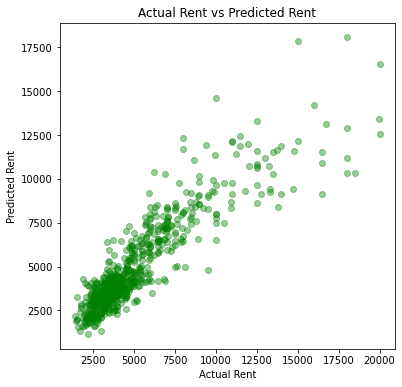

In [31]:
plt.figure(figsize=(6, 6)) 

# y_test is 20% of our df['rent']
plt.scatter(y_test, y_predict, alpha=0.4, color = 'green')
plt.title("Actual Rent vs Predicted Rent")
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")

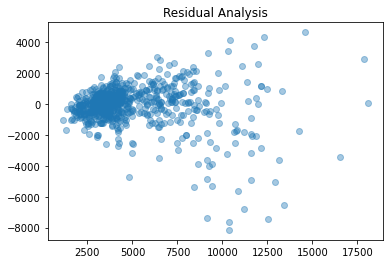

In [32]:
residuals = y_predict - y_test
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
plt.show()

# Evaluating the Model's Accuracy

#### `training set` mean squared error regression loss

In [33]:
# Creating a prediction for x_train
y_predict2 = mlr.predict(x_train)

# Total residuals
u = ((y_train - y_predict2) ** 2).sum()
# TSS
v = ((y_train - y_train.mean()) ** 2).sum()
# R^2 Score
1 - u/v

0.7652203665505264

#### `testing set` mean squared error regression loss

In [34]:
# Total residuals
u = ((y_test - y_predict) ** 2).sum()
# TSS
v = ((y_test - y_test.mean()) ** 2).sum()

# R**2
1-u/v

0.8049075159356498

#### Using .score() method

In [35]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7652203665505264
0.8049075159356498


# Rebuild the Model
work in progress

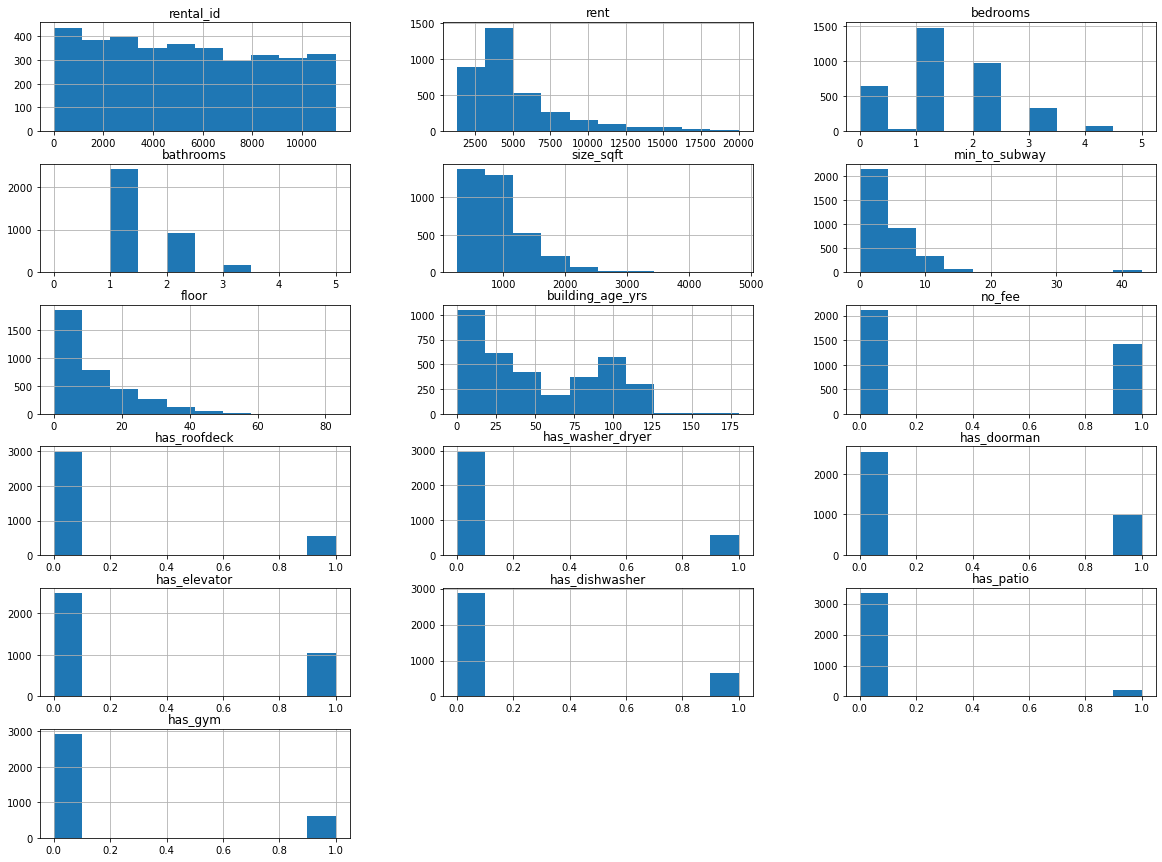

In [126]:
#plot all distributions
df.hist(figsize = (20,15), layout = (6,3))
plt.show()

<AxesSubplot:xlabel='no_fee', ylabel='rent'>

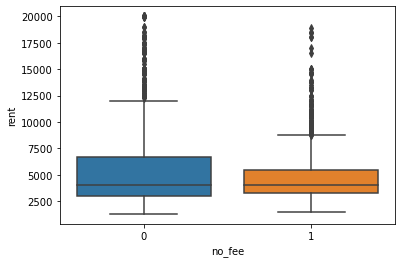

In [40]:
sns.boxplot(x='no_fee', y='rent', data=df)

In [105]:
x.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')

In [106]:
model.coef_

array([-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
         24.19824177,   -7.58272473, -140.90664773,   48.85017415,
        191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
        -19.31948556,  -38.92369828])

In [37]:
#correlation matrix
matrix = df[['rent','bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway' ,
       'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 
       'has_washer_dryer', 'has_doorman', 'has_elevator', 
       'has_dishwasher', 'has_patio', 'has_gym'
      ]].corr()

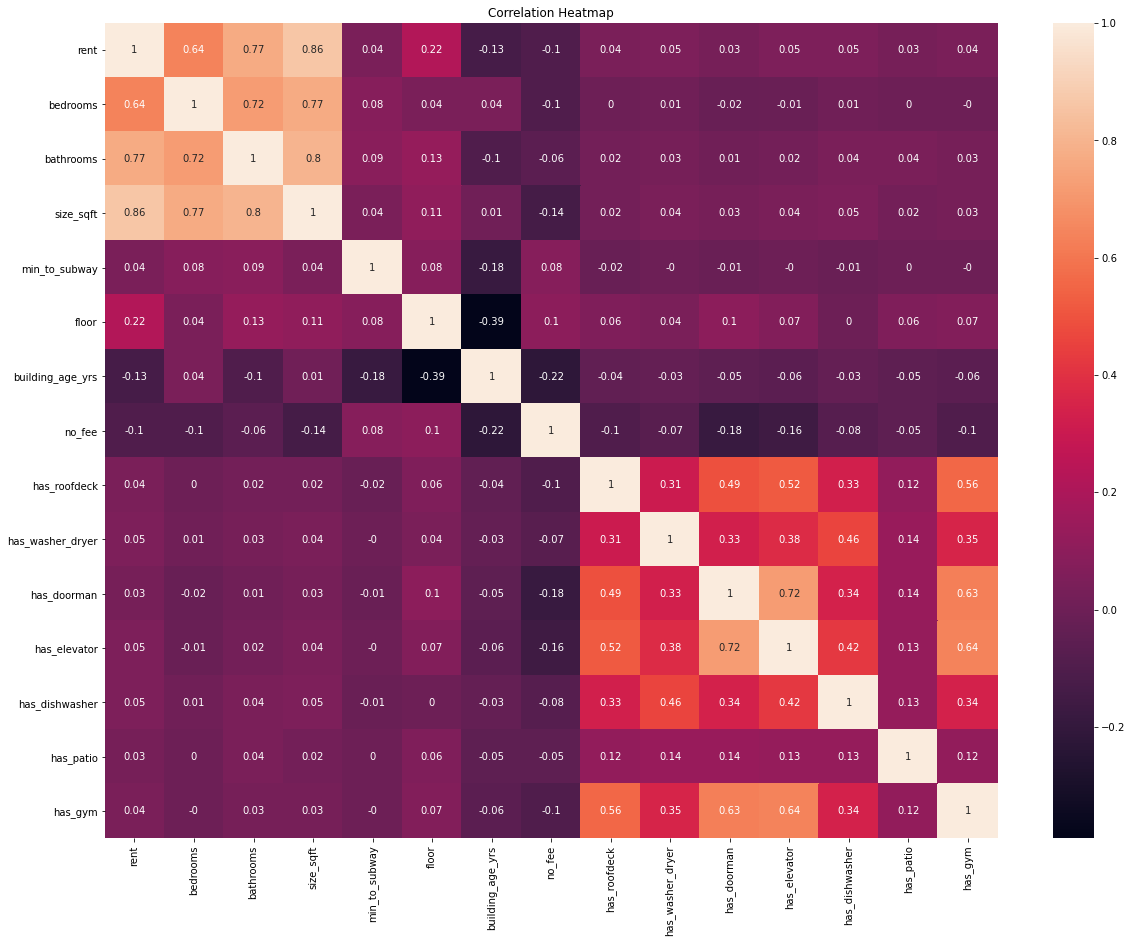

In [111]:
#correlation heatmap
plt.figure(figsize=(20, 15)) 

sns.heatmap(data = np.round(matrix,2), annot = True)

plt.title('Correlation Heatmap')
plt.show()

C:\Users\Toto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_to_subway', ylabel='rent'>

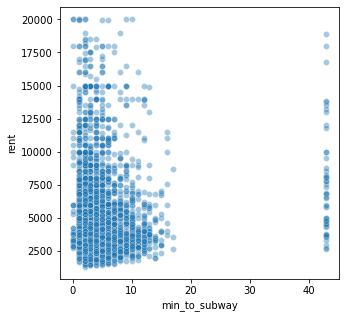

In [130]:
plt.figure(figsize=(5, 5)) 
sns.scatterplot(df['min_to_subway'], df['rent'], alpha = 0.4)

In [122]:
corr, p = pearsonr(df['size_sqft'], df['rent'])
print(corr, p)

0.8579536612266565 0.0


C:\Users\Toto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='building_age_yrs', ylabel='rent'>

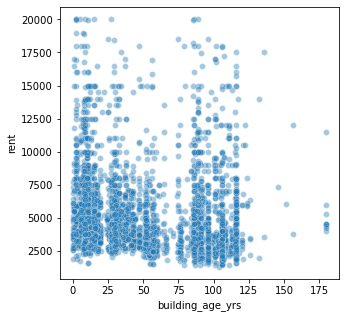

In [120]:
plt.figure(figsize=(5, 5)) 
sns.scatterplot(df['building_age_yrs'], df['rent'], alpha = 0.4)

In [121]:
corr, p = pearsonr(df['building_age_yrs'], df['rent'])
print(corr, p)

-0.12889488750787503 1.3895984012079753e-14


3539